### Assignment: Unsupervised and Reinforcement Learning

#### Exercise 1: Destination reviews

Dataset with destination reviews published by 249 reviewers of holidayiq.com.

1. Use the k-means angorithm to cluster the reviews in 5 groups using all attributes except the ID. Run the algorithm 60 times with different centroid seeds and obtain the centroids. 
2. Identify the number of clusters using the silhouette analysis.

In [16]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [17]:
import pandas as pd 

# Reading data file into pandas dataframe
data = pd.read_csv("buddymove_holidayiq.csv") 
data.head()

,User Id,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,User 1,2,77,79,69,68,95
1,User 2,2,62,76,76,69,68
2,User 3,2,50,97,87,50,75
3,User 4,2,68,77,95,76,61
4,User 5,2,98,54,59,95,86


In [18]:
# Removing ID to prepare for clustering k-means algorithm
clust_data = data.iloc[:,1:]
clust_data.head()

,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,2,77,79,69,68,95
1,2,62,76,76,69,68
2,2,50,97,87,50,75
3,2,68,77,95,76,61
4,2,98,54,59,95,86


In [22]:
# Using KMeans from scikit learn
from sklearn.cluster import KMeans

# From scikit learn documentation 
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
#    n_init : int, default: 10
#    Number of time the k-means algorithm will be run with different centroid seeds. 
#    The final results will be the best output of n_init consecutive runs in terms of inertia.

# As scikit learn documentation is stating, the k-means algorithm will be run using different centroid seeds
# The default is 10 times, but as the assignment indicates, we will be running the algorithm 60 times.

# 
km_alg = KMeans(n_clusters=5, n_init=60)
km_alg.fit(clust_data)
clust_result = km_alg.predict(clust_data)

clust_centroids = km_alg.cluster_centers_

print("After running the algorithm 60 times, the best result yields the following centroids:")
print(clust_centroids)

After running the algorithm 60 times, the best result yields the following centroids:
[[ 17.6744186   96.86046512 195.72093023 132.58139535  90.30232558
  147.44186047]
 [ 17.06779661 127.25423729 140.94915254 144.74576271 134.69491525
  138.05084746]
 [  6.          83.06451613 108.75268817 101.02150538  80.27956989
   94.60215054]
 [  5.875      118.95833333  66.25        81.54166667 124.125
  100.08333333]
 [ 17.3        169.4         85.63333333 112.83333333 192.4
  143.16666667]]


In [27]:
# For the second question
# I will test different numbers of centroids

n_centroids_list = [2,3,4,5,6,7,8]

for n_centroids in n_centroids_list:
    
    km_alg2 = KMeans(n_clusters=n_centroids, n_init=60)
    km_alg2.fit(clust_data)
    clust_result2 = km_alg2.predict(clust_data)

    silhouette_avg = silhouette_score(clust_data, clust_result2)
    
    print("Number of centroids: {}".format(n_centroids))
    print("The average silhouette_score is: {}".format(silhouette_avg))

Number of centroids: 2
The average silhouette_score is: 0.30794264630855106
Number of centroids: 3
The average silhouette_score is: 0.3492187864800945
Number of centroids: 4
The average silhouette_score is: 0.3422572691507888
Number of centroids: 5
The average silhouette_score is: 0.3030126348816013
Number of centroids: 6
The average silhouette_score is: 0.29909588915727814
Number of centroids: 7
The average silhouette_score is: 0.2875731798874967
Number of centroids: 8
The average silhouette_score is: 0.3054187605036031


For n_clusters = 2 The average silhouette_score is : 0.3079416087641895
For n_clusters = 3 The average silhouette_score is : 0.3492187864800945
For n_clusters = 4 The average silhouette_score is : 0.3422572691507888
For n_clusters = 5 The average silhouette_score is : 0.28964374748052757
For n_clusters = 6 The average silhouette_score is : 0.3033195913592543
For n_clusters = 7 The average silhouette_score is : 0.2807053525003885
For n_clusters = 8 The average silhouette_score is : 0.3054187605036031


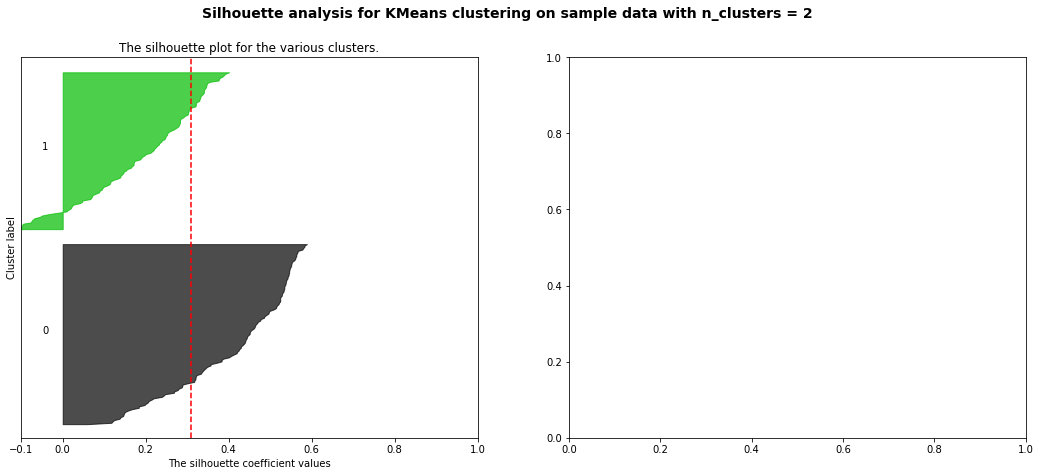

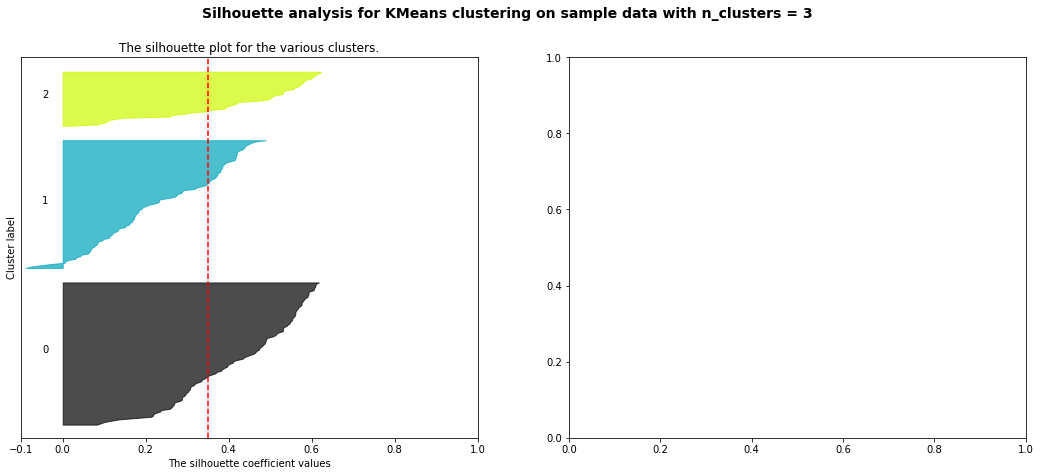

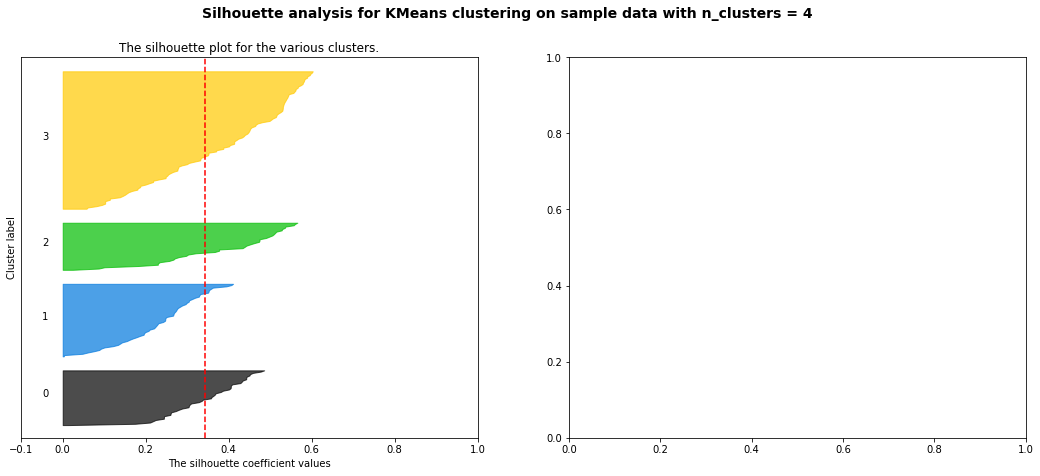

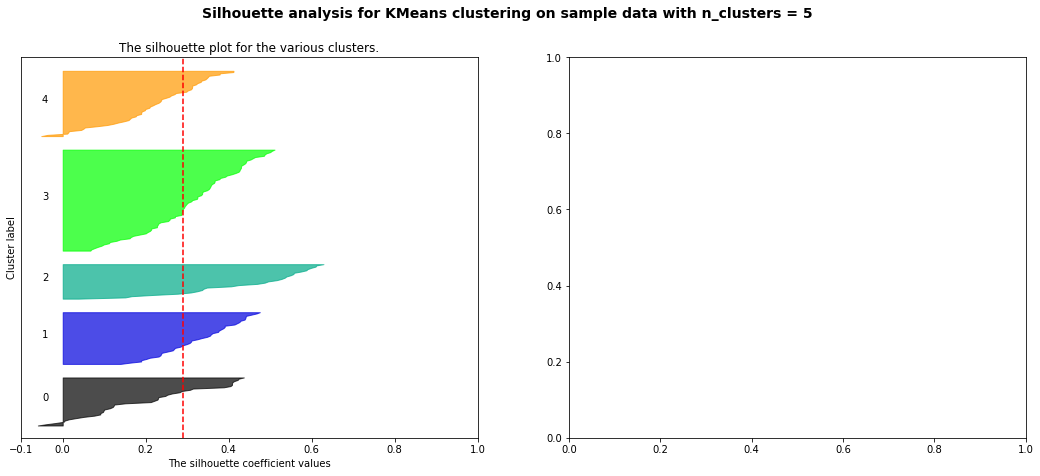

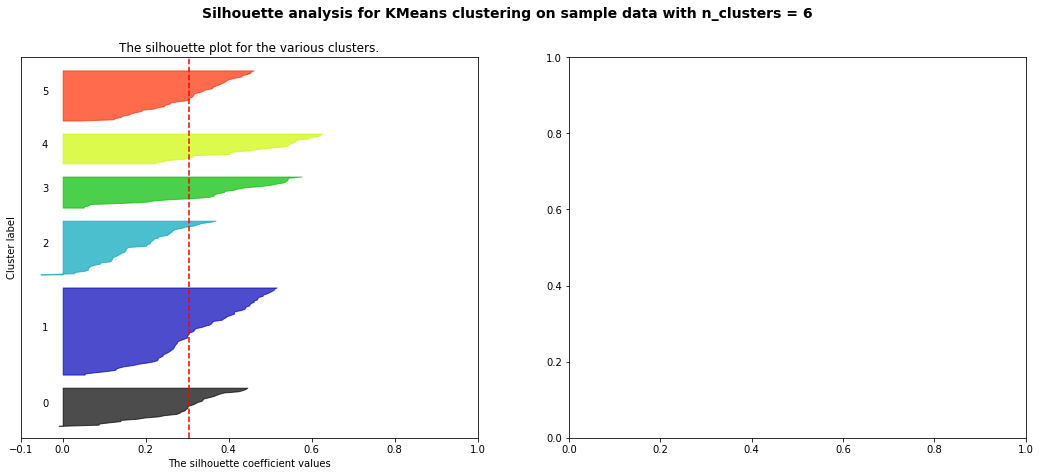

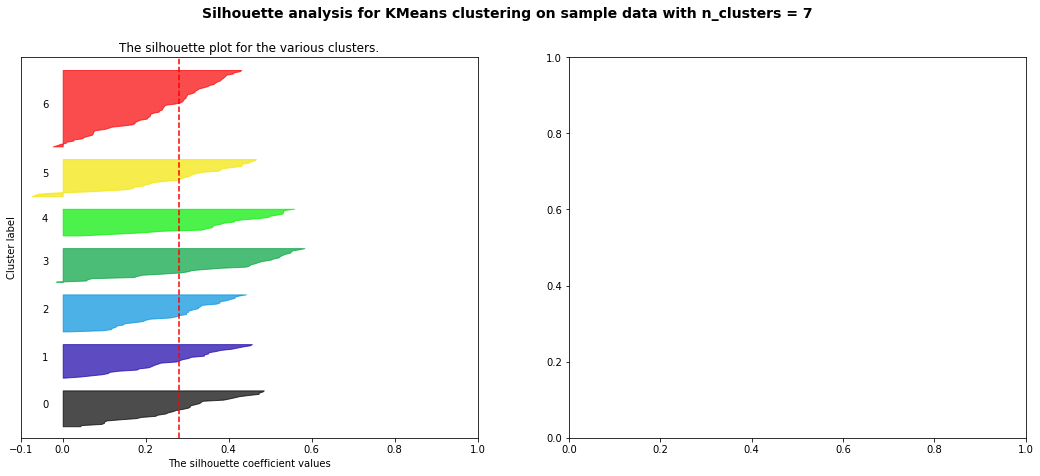

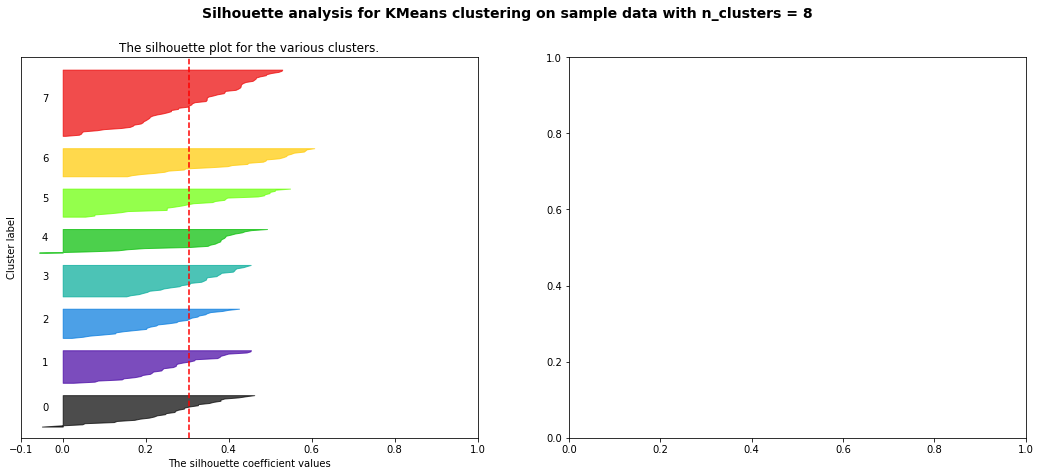

In [28]:
X = clust_data
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()